# Distinguish Your Own Digits (DYOD)

You are going to write a classifier that distinguishes between the number 3 and number 8.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

From the command line run `pip install mnist`. This is a library that will help you bring down the mnist dataset. If you run this from a notebook, you need to put  `!pip install mnist` in a cell by itself.

In [3]:
!pip install mnist

## Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


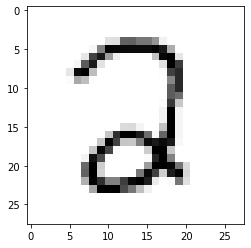

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

In [15]:
#Impoting functions from 'Kudzu'
from kudzu.model import Model
from kudzu.train import Learner
from kudzu.optim import GD
from kudzu.data import Data, Sampler,Dataloader

from kudzu.callbacks import AccCallback
from kudzu.callbacks import ClfCallback

from kudzu.loss import MSE

from kudzu.layer import Sigmoid,Relu
from kudzu.layer import Affine

### Let us create a `Config` class, to store important parameters. 
This class essentially plays the role of a dictionary.

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

### Running Models with the Training data
Details about the network layers:
- A first affine layer has 784 inputs and does 100 affine transforms. These are followed by a Relu
- A second affine layer has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a Relu
- A third affine layer has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
- A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.


In [17]:
data = Data(X_train, y_train.reshape(-1,1))
sampler = Sampler(data, config.bs, shuffle=True)

dl = Dataloader(data, sampler)

opt = GD(config.lr)
loss = MSE()

In [18]:
training_data_x = X_train
testing_data_x = X_test
training_data_y = y_train.reshape(-1,1)
testing_data_y = y_test.reshape(-1,1)

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("last", 2, 1), Sigmoid("last")]
model_nn = Model(layers)
model_lr = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

xavier
xavier
xavier
xavier
xavier


In [20]:
nn_learner = Learner(loss, model_nn, opt, config.num_epochs)
acc_nn = ClfCallback(nn_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
nn_learner.set_callbacks([acc_nn])

In [21]:
lr_learner = Learner(loss, model_lr, opt, config.num_epochs)
acc_lr = ClfCallback(lr_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
lr_learner.set_callbacks([acc_lr])

In [22]:
nn_learner.train_loop(dl)

Epoch 0, Loss 0.2495
Training Accuracy: 0.5579, Testing Accuracy: 0.5524



Epoch 10, Loss 0.2042
Training Accuracy: 0.8852, Testing Accuracy: 0.8921



Epoch 20, Loss 0.1063
Training Accuracy: 0.9097, Testing Accuracy: 0.9194



Epoch 30, Loss 0.0658
Training Accuracy: 0.9298, Testing Accuracy: 0.9395



Epoch 40, Loss 0.051
Training Accuracy: 0.9429, Testing Accuracy: 0.9511



Epoch 50, Loss 0.0435
Training Accuracy: 0.9511, Testing Accuracy: 0.9597



Epoch 60, Loss 0.0389
Training Accuracy: 0.9548, Testing Accuracy: 0.9622



Epoch 70, Loss 0.0359
Training Accuracy: 0.9587, Testing Accuracy: 0.9642



Epoch 80, Loss 0.0337
Training Accuracy: 0.9608, Testing Accuracy: 0.9667



Epoch 90, Loss 0.032
Training Accuracy: 0.9628, Testing Accuracy: 0.9693



Epoch 100, Loss 0.0306
Training Accuracy: 0.9645, Testing Accuracy: 0.9703



Epoch 110, Loss 0.0295
Training Accuracy: 0.9657, Testing Accuracy: 0.9698



Epoch 120, Loss 0.0285
Training Accuracy: 0.9667, Testing Accuracy: 0.9713



Epoch 130, Loss 0.0277
Training Accuracy: 0.9676, Testing Accuracy: 0.9698



Epoch 140, Loss 0.0269
Training Accuracy: 0.9687, Testing Accuracy: 0.9723



Epoch 150, Loss 0.0262
Training Accuracy: 0.9693, Testing Accuracy: 0.9713



Epoch 160, Loss 0.0256
Training Accuracy: 0.9699, Testing Accuracy: 0.9713



Epoch 170, Loss 0.025
Training Accuracy: 0.9700, Testing Accuracy: 0.9703



Epoch 180, Loss 0.0244
Training Accuracy: 0.9704, Testing Accuracy: 0.9703



Epoch 190, Loss 0.0239
Training Accuracy: 0.9715, Testing Accuracy: 0.9708



Epoch 200, Loss 0.0234
Training Accuracy: 0.9717, Testing Accuracy: 0.9713



Epoch 210, Loss 0.0229
Training Accuracy: 0.9725, Testing Accuracy: 0.9728



Epoch 220, Loss 0.0225
Training Accuracy: 0.9731, Testing Accuracy: 0.9728



Epoch 230, Loss 0.0221
Training Accuracy: 0.9733, Testing Accuracy: 0.9733



Epoch 240, Loss 0.0217
Training Accuracy: 0.9740, Testing Accuracy: 0.9733



0.03846002391222564

In [23]:
lr_learner.train_loop(dl)

Epoch 0, Loss 0.234
Training Accuracy: 0.7018, Testing Accuracy: 0.7198



Epoch 10, Loss 0.1065
Training Accuracy: 0.8983, Testing Accuracy: 0.9073



Epoch 20, Loss 0.0815
Training Accuracy: 0.9216, Testing Accuracy: 0.9370



Epoch 30, Loss 0.0698
Training Accuracy: 0.9340, Testing Accuracy: 0.9420



Epoch 40, Loss 0.0628
Training Accuracy: 0.9405, Testing Accuracy: 0.9471



Epoch 50, Loss 0.0581
Training Accuracy: 0.9441, Testing Accuracy: 0.9531



Epoch 60, Loss 0.0546
Training Accuracy: 0.9466, Testing Accuracy: 0.9561



Epoch 70, Loss 0.0519
Training Accuracy: 0.9492, Testing Accuracy: 0.9592



Epoch 80, Loss 0.0498
Training Accuracy: 0.9503, Testing Accuracy: 0.9607



Epoch 90, Loss 0.048
Training Accuracy: 0.9514, Testing Accuracy: 0.9612



Epoch 100, Loss 0.0466
Training Accuracy: 0.9526, Testing Accuracy: 0.9627



Epoch 110, Loss 0.0453
Training Accuracy: 0.9540, Testing Accuracy: 0.9642



Epoch 120, Loss 0.0442
Training Accuracy: 0.9549, Testing Accuracy: 0.9642



Epoch 130, Loss 0.0433
Training Accuracy: 0.9555, Testing Accuracy: 0.9642



Epoch 140, Loss 0.0424
Training Accuracy: 0.9562, Testing Accuracy: 0.9647



Epoch 150, Loss 0.0416
Training Accuracy: 0.9567, Testing Accuracy: 0.9652



Epoch 160, Loss 0.0409
Training Accuracy: 0.9573, Testing Accuracy: 0.9652



Epoch 170, Loss 0.0403
Training Accuracy: 0.9576, Testing Accuracy: 0.9657



Epoch 180, Loss 0.0397
Training Accuracy: 0.9580, Testing Accuracy: 0.9657



Epoch 190, Loss 0.0392
Training Accuracy: 0.9588, Testing Accuracy: 0.9657



Epoch 200, Loss 0.0387
Training Accuracy: 0.9591, Testing Accuracy: 0.9662



Epoch 210, Loss 0.0383
Training Accuracy: 0.9594, Testing Accuracy: 0.9662



Epoch 220, Loss 0.0379
Training Accuracy: 0.9598, Testing Accuracy: 0.9667



Epoch 230, Loss 0.0375
Training Accuracy: 0.9596, Testing Accuracy: 0.9672



Epoch 240, Loss 0.0371
Training Accuracy: 0.9599, Testing Accuracy: 0.9672



0.03316486026189965

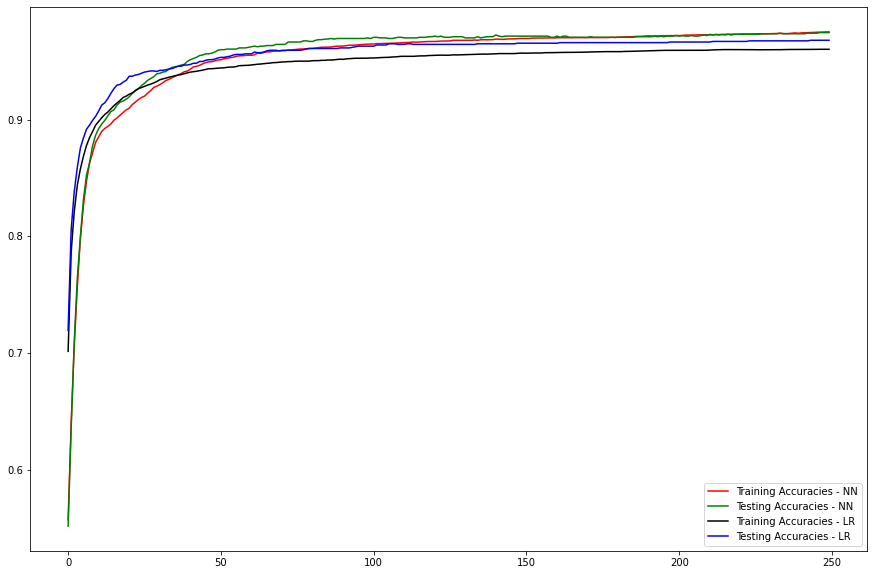

In [24]:
#comparing the results of NN and LR
plt.figure(figsize=(15,10))

# Neural Network plots
plt.plot(acc_nn.accuracies, 'r-', label = "Training Accuracies - NN")
plt.plot(acc_nn.test_accuracies, 'g-', label = "Testing Accuracies - NN")

# Logistic Regression plots
plt.plot(acc_lr.accuracies, 'k-', label = "Training Accuracies - LR")
plt.plot(acc_lr.test_accuracies, 'b-', label = "Testing Accuracies - LR")
plt.legend()

#### Plotting the outputs of this layer of the NN.


In [25]:
new_model = Model(layers[:-2])
testing_plot = new_model(testing_data_x)

Text(0.5, 1.0, 'Outputs')

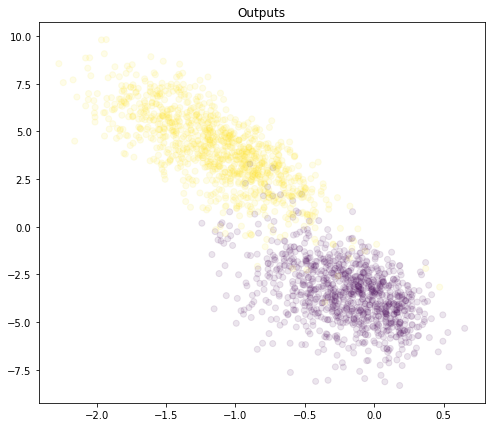

In [26]:
# Plotting the scatter plot of points and color coding by class
plt.figure(figsize=(8,7))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel());
plt.title('Outputs')

Probability contours

In [27]:
model_prob = Model(layers[-2:]) 

In [28]:
#creating the x and y ranges according to the above generated plot.
x_range = np.linspace(-4, 1, 100) 
y_range = np.linspace(-6, 6, 100) 
x_grid, y_grid = np.meshgrid(x_range, y_range) # x_grid and y_grig are of size 100 X 100

# converting x_grid and y_grid to continuous arrays
x_gridflat = np.ravel(x_grid)
y_gridflat = np.ravel(y_grid)

# The last layer of the current model takes two columns as input. Hence transpose of np.vstack() is required.
X = np.vstack((x_gridflat, y_gridflat)).T

prob_contour = model_prob(X).reshape(100,100) 

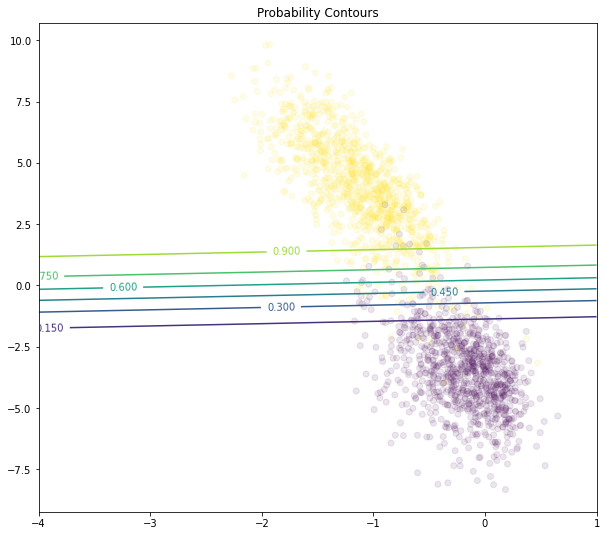

In [29]:
plt.figure(figsize=(10,9))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(x_grid,y_grid,prob_contour)
plt.title('Probability Contours')
plt.clabel(contours, inline = True );